In [51]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [52]:
data= pd.read_csv('Social_Network.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [53]:
df = pd.DataFrame(data)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [54]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [55]:
df.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [104]:
df['Gender'] = df['Gender'].replace({'Male': 2, 'Female': 1})  
pd.set_option('future.no_silent_downcasting',True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,2,19,19000,0
1,15810944,2,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,2,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,2,51,23000,1
397,15654296,1,50,20000,1
398,15755018,2,36,33000,0


In [105]:
X=pd.DataFrame(df , columns= ['User ID','Gender','Age','EstimatedSalary'])
Y= data['Purchased']

In [106]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,1.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,1.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,1.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,1.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,2.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,2.000000,60.000000,150000.000000,1.000000


In [107]:
df['Gender'] = df['Gender'].astype(int)  

In [108]:
print(df['Gender'].dtype)

int32


In [109]:
X_train , X_test ,Y_train , Y_test =train_test_split(X,Y ,test_size=0.20  , random_state=0 )

In [111]:
logreg=LogisticRegression(solver='liblinear' )
logreg.fit(X_train , Y_train)
y_pred =logreg.predict(X_test)

In [114]:
print('accuracy :' , metrics.accuracy_score(Y_test , y_pred)*100)

accuracy : 82.5


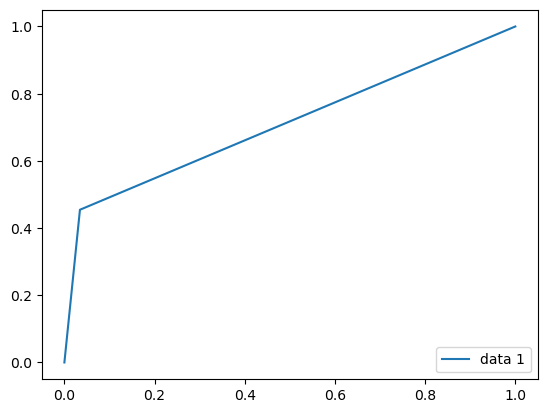

In [118]:
fpr,tpr,_ = metrics.roc_curve(Y_test , y_pred)
plt.plot(fpr,tpr , label ='data 1')
plt.legend(loc=4)
plt.show()

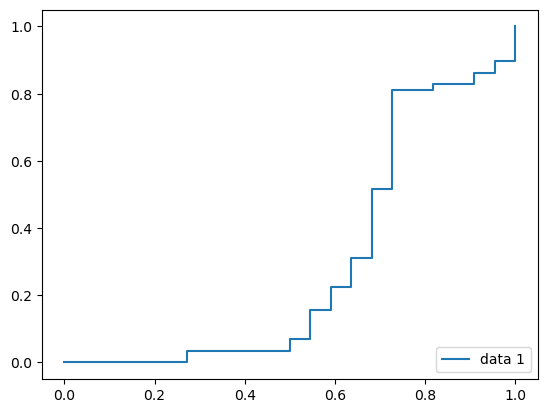

In [127]:
y_pred_proba = logreg.predict_proba(X_test)[:: , 1]
tpr,fpr,_ = metrics.roc_curve(Y_test , y_pred_proba)
plt.plot(fpr,tpr , label ='data 1')
plt.legend(loc=4)
plt.show()

In [129]:
logreg.predict_proba(X)

array([[0.8504441 , 0.1495559 ],
       [0.85077866, 0.14922134],
       [0.76536231, 0.23463769],
       [0.69959756, 0.30040244],
       [0.60553052, 0.39446948],
       [0.69836115, 0.30163885],
       [0.55291985, 0.44708015],
       [0.21092941, 0.78907059],
       [0.80328397, 0.19671603],
       [0.6627119 , 0.3372881 ],
       [0.57500977, 0.42499023],
       [0.7236972 , 0.2763028 ],
       [0.5464502 , 0.4535498 ],
       [0.85479882, 0.14520118],
       [0.5655271 , 0.4344729 ],
       [0.57933712, 0.42066288],
       [0.83381141, 0.16618859],
       [0.82824034, 0.17175966],
       [0.82325358, 0.17674642],
       [0.81809114, 0.18190886],
       [0.84175374, 0.15824626],
       [0.74103367, 0.25896633],
       [0.77479244, 0.22520756],
       [0.8408134 , 0.1591866 ],
       [0.83965895, 0.16034105],
       [0.84756155, 0.15243845],
       [0.82504018, 0.17495982],
       [0.81484326, 0.18515674],
       [0.76726262, 0.23273738],
       [0.85418507, 0.14581493],
       [0.

In [131]:
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [167]:
from  sklearn.metrics import classification_report , confusion_matrix
logreg.classes_

array([0, 1], dtype=int64)

In [168]:
logreg.intercept_

array([8.01277861e-13])

In [169]:
logreg.coef_

array([[-1.39713601e-07, -1.03389998e-10,  2.84458656e-08,
         2.34140827e-05]])

In [170]:
logreg.score(X, Y)

0.785

In [171]:
confusion_matrix(Y , logreg.predict(X))

array([[245,  12],
       [ 74,  69]], dtype=int64)

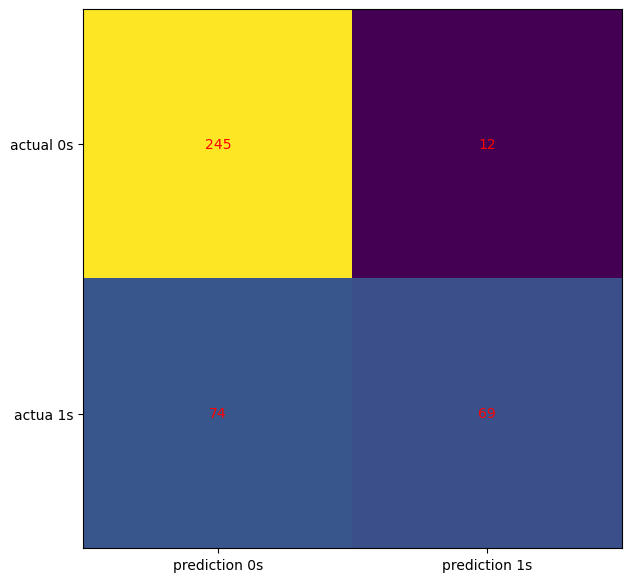

In [172]:
cm = confusion_matrix(Y , logreg.predict(X))
fig , ax = plt.subplots(figsize=(7,7))
plt.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('prediction 0s' ,'prediction 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('actual 0s','actua 1s'))
plt.ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j , i , cm[i ,j] , ha="center" , va='center', color='red')
plt.show()

In [175]:
print(classification_report(Y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.83      0.45      0.59        22

    accuracy                           0.82        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.83      0.82      0.81        80

